In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import scipy.stats as stats
from scipy.stats import beta, gamma, lognorm, norm
import warnings

warnings.filterwarnings("ignore", message="divide by zero encountered in log")
warnings.filterwarnings("ignore", message="invalid value encountered in divide")
warnings.filterwarnings("ignore", message="divide by zero encountered in divide")

In [78]:
df = pd.read_csv('Old_Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001666 entries, 0 to 2001665
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   status          object 
 1   bed             float64
 2   bath            float64
 3   acre_lot        float64
 4   city            object 
 5   state           object 
 6   zip_code        float64
 7   house_size      float64
 8   prev_sold_date  object 
 9   price           float64
dtypes: float64(6), object(4)
memory usage: 152.7+ MB


## Null Percentage:

In [141]:
nulls_percent = df.isnull().sum()*100 / df.shape[0]
print(nulls_percent.round(3))

status             0.000
bed               16.914
bath              17.122
acre_lot          20.921
city               0.015
state              0.000
zip_code           0.026
house_size        32.233
prev_sold_date    49.691
price              0.014
dtype: float64


There is no feature with a null percentage exceeding 70% which means that the missing values can be dealt with rather than eliminating the column from the dataset

## Correlation:

In [142]:
for i in df.columns[:9] :
    if df[i].dtype != "object":
        print("Correlation between",i, "and the label \"price\": ", round(df[i].corr(df["price"])*100,2))

Correlation between bed and the label "price":  16.01
Correlation between bath and the label "price":  27.79
Correlation between acre_lot and the label "price":  -0.1
Correlation between zip_code and the label "price":  -7.42
Correlation between house_size and the label "price":  14.15


There are no high correlations between the features and the label, so none will be redundant features. It is important to note that there exists a high correlation between the city,state and the zipcode as the city and the state are could be determined through the zip code.

## Fixing Data Types

In [79]:
df["bed"] = df["bed"].convert_dtypes(int)
df["bath"] = df["bath"].convert_dtypes(int)
df["zip_code"] = df["zip_code"].convert_dtypes(int)

df['zip_code'] = df['zip_code'].astype(str).fillna('')
df['zip_code'] = df['zip_code'].apply(lambda x: x.zfill(5))  

df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3,2,0.12,Adjuntas,Puerto Rico,00601,920.0,NaN,105000.0
1,for_sale,4,2,0.08,Adjuntas,Puerto Rico,00601,1527.0,NaN,80000.0
2,for_sale,2,1,0.15,Juana Diaz,Puerto Rico,00795,748.0,NaN,67000.0
3,for_sale,4,2,0.10,Ponce,Puerto Rico,00731,1800.0,NaN,145000.0
4,for_sale,6,2,0.05,Mayaguez,Puerto Rico,00680,NaN,NaN,65000.0


## Zip_Code
Preparing the Zip_code by shortening it to two digits since we don't need the first three digits as they indicate the state and city which are already present in the dataset. We will also set the null values to 100

In [80]:
df['zip_code'] = df['zip_code'].str[3:]
df['zip_code'] = df['zip_code'].replace("A>", "100")
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3,2,0.12,Adjuntas,Puerto Rico,01,920.0,NaN,105000.0
1,for_sale,4,2,0.08,Adjuntas,Puerto Rico,01,1527.0,NaN,80000.0
2,for_sale,2,1,0.15,Juana Diaz,Puerto Rico,95,748.0,NaN,67000.0
3,for_sale,4,2,0.10,Ponce,Puerto Rico,31,1800.0,NaN,145000.0
4,for_sale,6,2,0.05,Mayaguez,Puerto Rico,80,NaN,NaN,65000.0


## Prev_Sold_Date
Changing the prev_sold_date into a boolean sold feature indicating whether the house was sold or not


In [81]:
df['sold'] = df['prev_sold_date'].notnull().map({True: 'yes', False: 'no'})
df.drop(["prev_sold_date"], axis=1, inplace=True)
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price,sold
0,for_sale,3,2,0.12,Adjuntas,Puerto Rico,01,920.0,105000.0,no
1,for_sale,4,2,0.08,Adjuntas,Puerto Rico,01,1527.0,80000.0,no
2,for_sale,2,1,0.15,Juana Diaz,Puerto Rico,95,748.0,67000.0,no
3,for_sale,4,2,0.10,Ponce,Puerto Rico,31,1800.0,145000.0,no
4,for_sale,6,2,0.05,Mayaguez,Puerto Rico,80,NaN,65000.0,no


## Handling the NULLs
We will handle the Nulls in the numerical features by setting them to the mean value. However, we will drop the rows with null price as each row needs a label

In [82]:
Bed_Mean = int(df['bed'].mean())
Bath_Mean = int(df['bath'].mean())
Acre_Mean = df['acre_lot'].mean()
Size_Mean = df['house_size'].mean()

df['bed'] = df['bed'].fillna(Bed_Mean)
df['bath'] = df['bath'].fillna(Bath_Mean)
df['acre_lot'] = df['acre_lot'].fillna(Acre_Mean)
df['house_size'] = df['house_size'].fillna(Size_Mean)

df.dropna(subset=["price"], axis = 0, inplace=True)

nulls_percent = df.isnull().sum()*100 / df.shape[0]
print(nulls_percent.round(3))

df['acre_lot'] = df['acre_lot'].round(2)
df['house_size'] = df['house_size'].round(2)
df.head()

status        0.000
bed           0.000
bath          0.000
acre_lot      0.000
city          0.012
state         0.000
zip_code      0.000
house_size    0.000
price         0.000
sold          0.000
dtype: float64


,status,bed,bath,acre_lot,city,state,zip_code,house_size,price,sold
0,for_sale,3,2,0.12,Adjuntas,Puerto Rico,01,920.00,105000.0,no
1,for_sale,4,2,0.08,Adjuntas,Puerto Rico,01,1527.00,80000.0,no
2,for_sale,2,1,0.15,Juana Diaz,Puerto Rico,95,748.00,67000.0,no
3,for_sale,4,2,0.10,Ponce,Puerto Rico,31,1800.00,145000.0,no
4,for_sale,6,2,0.05,Mayaguez,Puerto Rico,80,2143.26,65000.0,no


## Outliers
Scatter Plots

In [94]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.drop(["price"], axis=1, inplace=True)

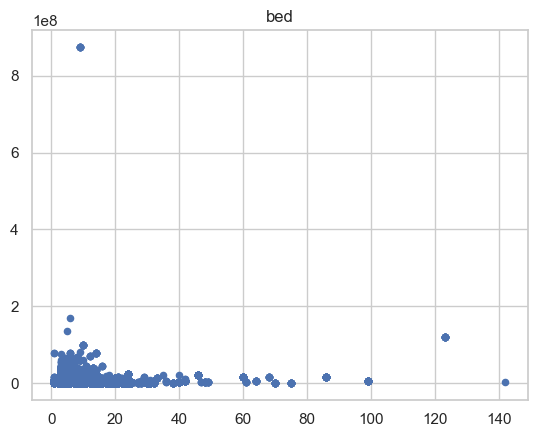

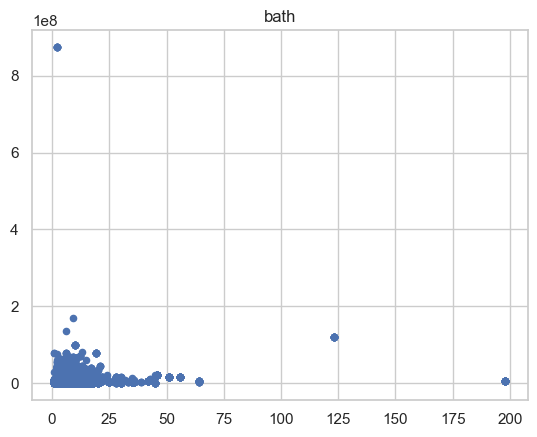

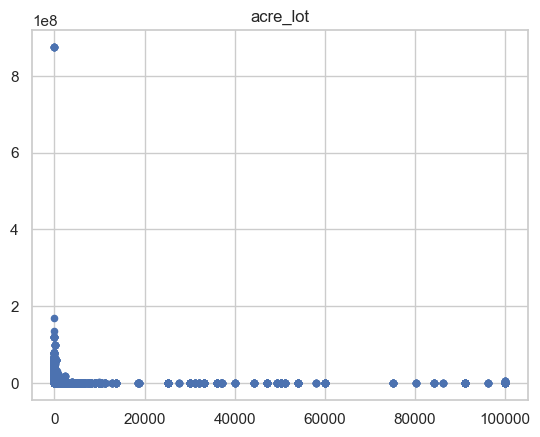

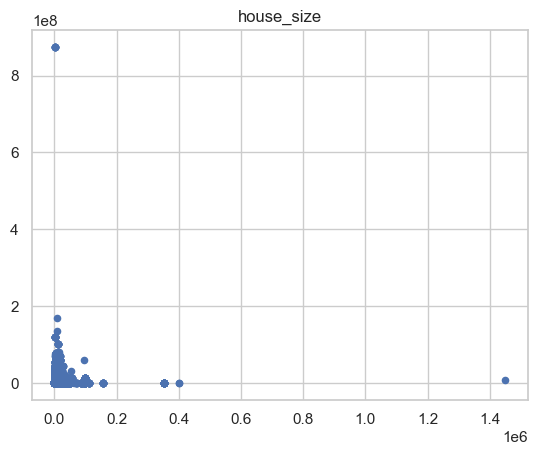

In [83]:
for i in numeric_df.columns:
    plt.scatter(numeric_df[i], df["price"], s = 20)
    plt.title(i)
    plt.show()

Box Plots

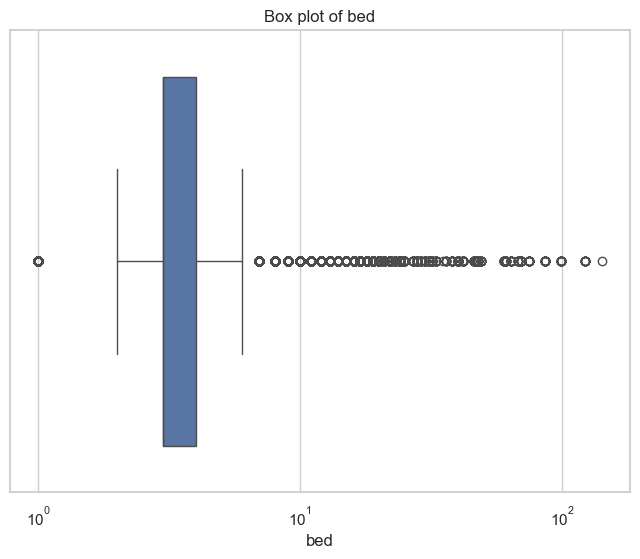

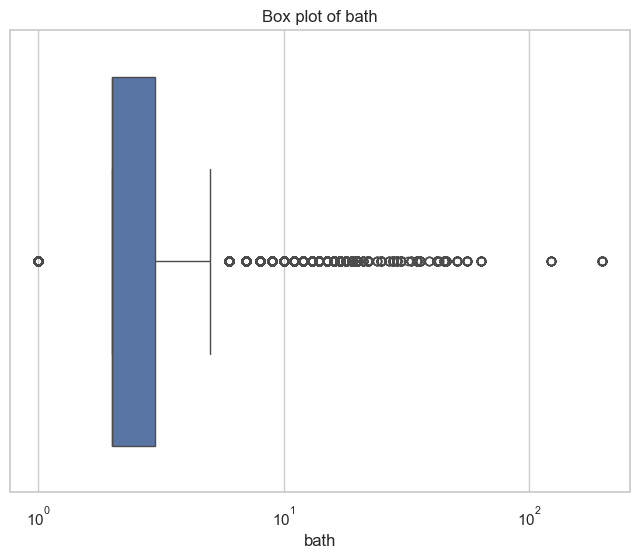

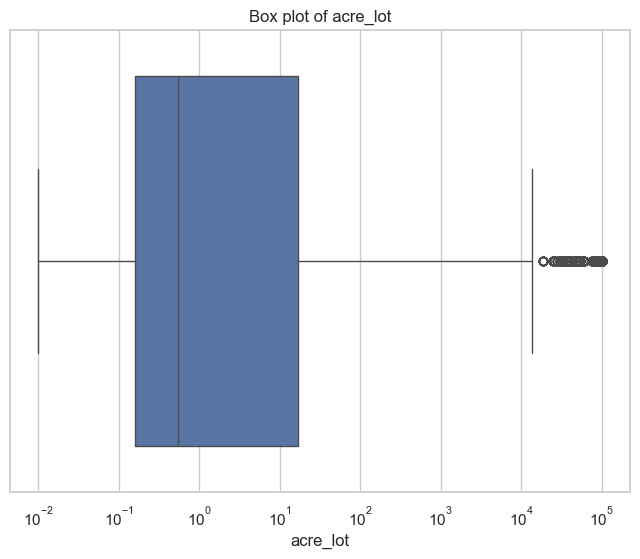

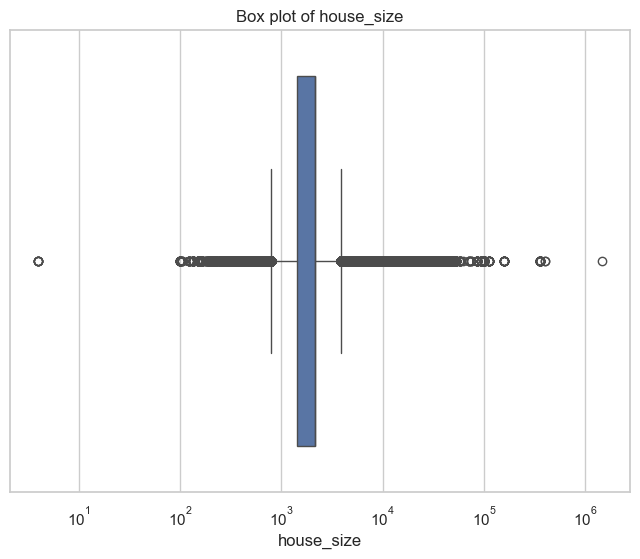

In [85]:
for column in numeric_df.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=numeric_df[column], log_scale=True, orient='h')
    plt.title(f'Box plot of {column}')
    plt.show()

Interquartile range

In [149]:
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
outlier = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))
print(IQR)
print()
print("- Outlier lower bound:")
print(Q1- 1.5 * IQR)
print()
print("- Outlier upper bound:")
print(Q3 + 1.5 * IQR)

print()
print("- Number of outliers:")
for i in numeric_df.columns:
    print(i, ":", outlier[i].sum())
print()
print("- Percentage of outliers:")
for i in numeric_df.columns:
    print(i, ":", (outlier[i].sum()*100/len(outlier[i])))

bed              1.0
bath             1.0
acre_lot       16.58
house_size    700.26
dtype: Float64

- Outlier lower bound:
bed              1.5
bath             0.5
acre_lot      -24.71
house_size    392.61
dtype: Float64

- Outlier upper bound:
bed               5.5
bath              4.5
acre_lot        41.61
house_size    3193.65
dtype: Float64

- Number of outliers:
bed : 258215
bath : 103210
acre_lot : 43214
house_size : 183853

- Percentage of outliers:
bed : 12.901751028657511
bath : 5.156903060115569
acre_lot : 2.1591939622113574
house_size : 9.186242595789437


## Distribution

- Statistical Overview
             bed       bath      acre_lot    house_size
count  2001395.0  2001395.0  2.001395e+06  2.001395e+06
mean    3.320771   2.355072  2.758145e+01  2.143248e+03
std     1.726139   1.573349  1.080575e+03  2.489143e+03
min          1.0        1.0  0.000000e+00  4.000000e+00
25%          3.0        2.0  1.600000e-01  1.443000e+03
50%          3.0        2.0  5.400000e-01  2.143260e+03
75%          4.0        3.0  1.674000e+01  2.143260e+03
max        142.0      198.0  1.000000e+05  1.450112e+06

- Mean
bed              3.320771
bath             2.355072
acre_lot        27.581445
house_size    2143.248242
dtype: Float64

- Median
bed               3.0
bath              2.0
acre_lot         0.54
house_size    2143.26
dtype: Float64

- Mode
   bed  bath  acre_lot  house_size
0    3     2     27.58     2143.26

- Standard Deviation
bed              1.726139
bath             1.573349
acre_lot       1080.57518
house_size    2489.143188
dtype: Float64

- Skewness
be

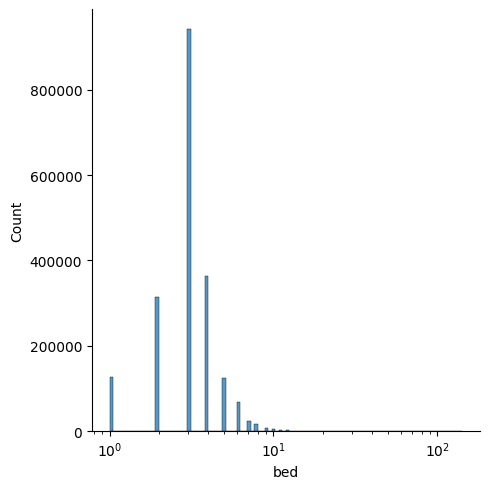

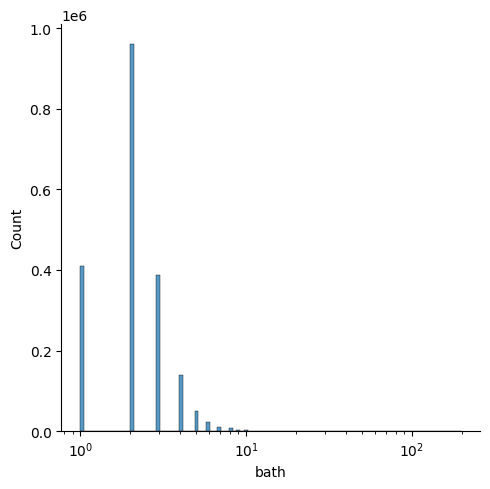

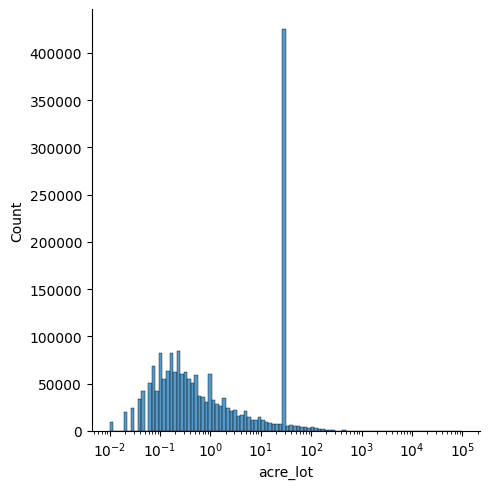

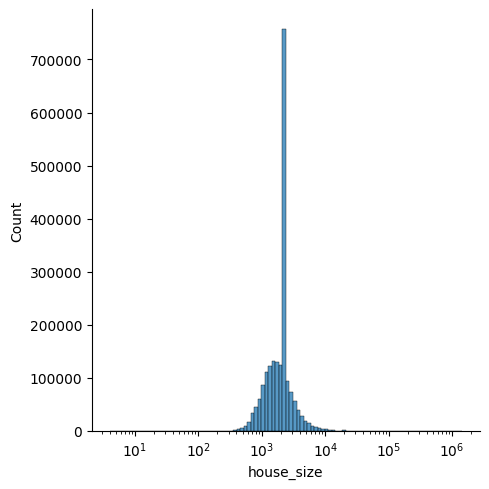

In [53]:
print("- Statistical Overview")
print(numeric_df.describe())
print()
print("- Mean")
print(numeric_df.mean())
print()
print("- Median")
print(numeric_df.median())
print()
print("- Mode")
print(numeric_df.mode())
print()
print("- Standard Deviation")
print(numeric_df.std())
print()
print("- Skewness")
print(numeric_df.skew())

for i in numeric_df.columns:
  sns.displot(data=numeric_df, x=i, bins=100, log_scale=True)

Histograms

## Scaling

In [95]:
scaler = StandardScaler()
numeric_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

numeric_df.head()
numeric_df.describe()

,bed,bath,acre_lot,house_size
count,2.001395e+06,2.001395e+06,2.001395e+06,2.001395e+06
mean,-2.835930e-17,-1.348522e-16,1.764468e-18,-1.510981e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.344487e+00,-8.612666e-01,-2.552479e-02,-8.594318e-01
25%,-1.858314e-01,-2.256794e-01,-2.537672e-02,-2.813211e-01
50%,-1.858314e-01,-2.256794e-01,-2.502505e-02,4.723759e-06
75%,3.934964e-01,4.099077e-01,-1.003303e-02,4.723759e-06
max,8.034074e+01,1.243494e+02,9.251780e+01,5.817139e+02


## One-Hot Encoding

In [96]:
print("Num of status: ",len(df["status"].unique()))
print("Num of cities: ",len(df["city"].unique()))
print("Num of states: ",len(df["state"].unique()))
print("Num of zipcodes: ",len(df["zip_code"].unique()))
print("Num of sold: ",len(df["sold"].unique()))

Num of status:  2
Num of cities:  5000
Num of states:  24
Num of zipcodes:  101
Num of sold:  2


In [ ]:
OHE = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
cols = ["city", "state", "zip_code", "status", "sold"]
NewDF = OHE.fit_transform(df[cols])
print(NewDF)

## Finalizing the Dataframe

In [ ]:
NewDF['bed'] = df['bed']
NewDF['bath'] = df['bath']
NewDF['acre_lot'] = df['acre_lot']
NewDF['house_size'] = df['house_size']
NewDF['price'] = df['price']



NewDF.info()